In [1]:
#importing necessory library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
data = pd.read_excel('iris (2).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.

In [7]:
#checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

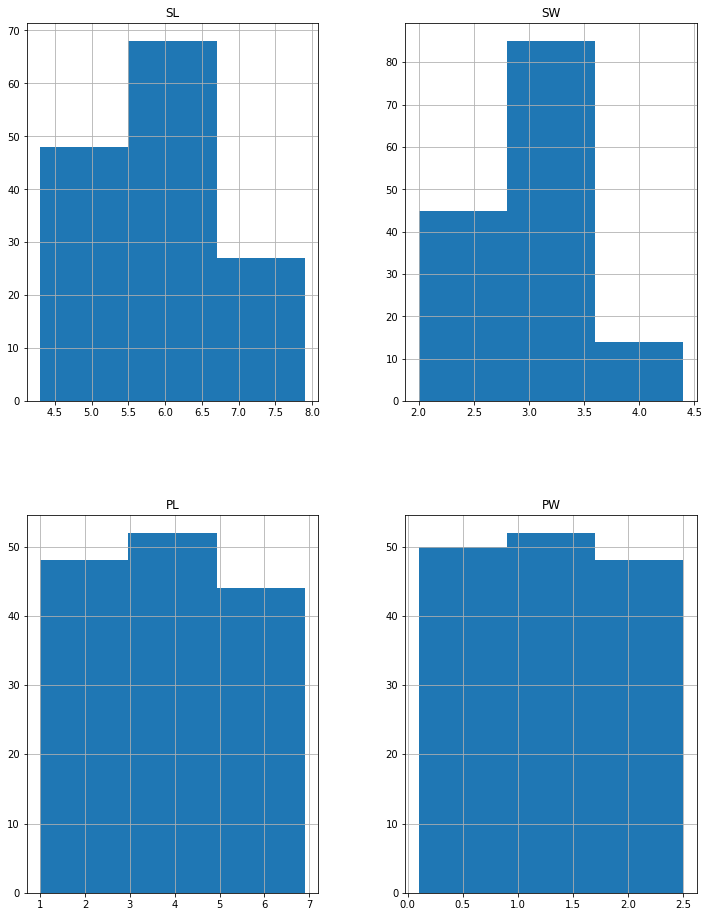

In [8]:
data.hist(bins=3, figsize=(12,16))

The three columns having null values are SL, SW and PL and both the feature values have a skewed distribution we can fill it with median

In [9]:
#filling values with median
data['SL'].fillna(data['SL'].median(),inplace=True)
data['SW'].fillna(data['SW'].median(),inplace=True)
data['PL'].fillna(data['PL'].median(),inplace=True)

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking for outliers

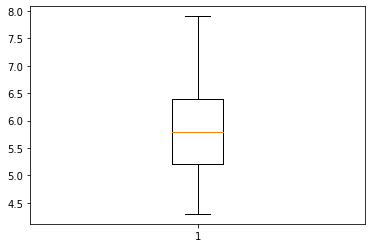

In [11]:
#boxplot of 'SL'
plt.boxplot(data['SL'])
plt.show()

It is clear from BoxPlot that SL feature does not have any outliers

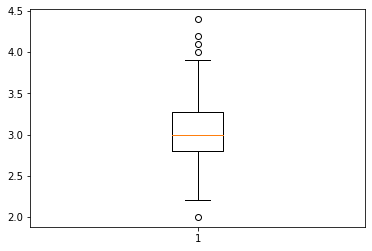

In [12]:
#boxplot of 'SW'
plt.boxplot(data['SW'])
plt.show()

Since there are some outliers in SW column let us handle it

In [13]:
#finding IQR
Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)
IQR = Q3-Q1
IQR

0.4750000000000001

In [14]:
#finding upper and lower limits
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
low_lim , up_lim

(2.0874999999999995, 3.9875)

In [16]:
#finding number of index of outliers present
out_low = np.where(data['SW'] <= low_lim)
out_up = np.where( data['SW'] >= up_lim )
print(out_low[0])
print(out_up[0])

[60]
[14 15 32 33]


In [18]:
#old Shape
data.shape
data.drop(out_up[0], inplace=True)
data.drop(out_low[0], inplace=True)
#new shape
data.shape

(145, 5)

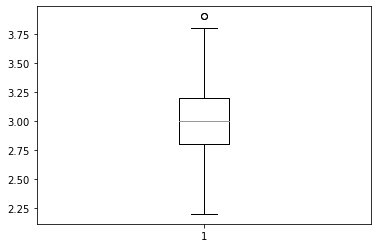

In [19]:
#boxplot of 'SW'
plt.boxplot(data['SW'])
plt.show()

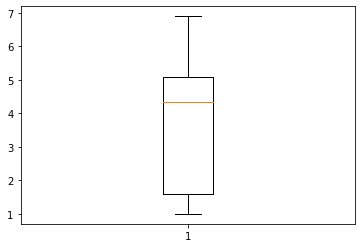

In [20]:
#boxplot of 'PL'
plt.boxplot(data['PL'])
plt.show()

It is clear from above boxplot that PL has no outliers

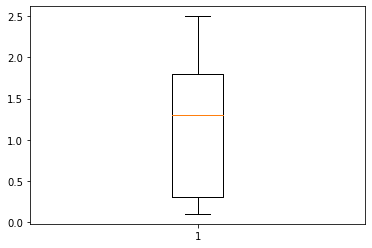

In [21]:
#boxplot of 'PW'
plt.boxplot(data['PW'])
plt.show()

It is clear from above boxplot that PW has no outliers

# Feature scaling

In [22]:
data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [23]:
#dependent variable in y
y=data['Classification']
#independent variable in x
x=data.drop(['Classification'],axis=1)

In [24]:
from sklearn import preprocessing
x=preprocessing.normalize(x)

In [26]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.750558,0.397703,0.465043,0.144106
std,0.048136,0.097243,0.154637,0.077887
min,0.631396,0.238392,0.168646,0.016695
25%,0.713666,0.325894,0.262330,0.051382
50%,0.747142,0.354212,0.539660,0.164742
75%,0.788928,0.507020,0.582878,0.197997
max,0.860939,0.607125,0.636981,0.280419


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [27]:
#Splitting of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)

# a. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [33]:
#evaluating the performance of the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.44      0.62         9
 Iris-virginica       0.69      1.00      0.81        11

       accuracy                           0.83        29
      macro avg       0.90      0.81      0.81        29
   weighted avg       0.88      0.83      0.81        29



# b. KNN Model

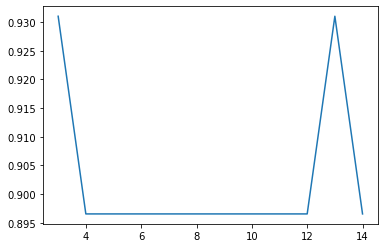

In [34]:
from sklearn.neighbors import KNeighborsClassifier

#to find optimal k value
acc_values=[]
for k in np.arange(3,15):
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    acc_values.append(acc)
plt.plot(np.arange(3,15),acc_values)
plt.show()

From the above plot it is clear that 3 and 15 are giving highest values. For the time being I Am choosing 3 as optimal value for K

In [35]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [36]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



# c. SVM Model

In [41]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [42]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



# 4. Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [44]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        29
      macro avg       0.95      0.93      0.93        29
   weighted avg       0.94      0.93      0.93        29



# e. Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [46]:
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



As choosing the Precision and recall metric valuesas our defining metric to models it is clare that random forest and svm classifier is best suited model for our data set